# 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

In [270]:
df = pd.read_csv('file/data.csv')

In [277]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [278]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [279]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis

In [14]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [280]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

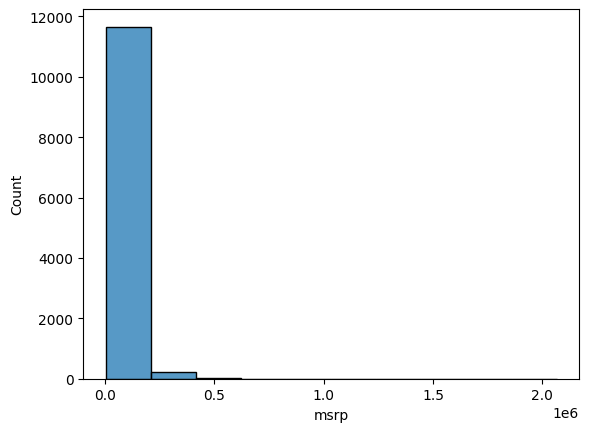

In [20]:
sns.histplot(df.msrp, bins=10)

<Axes: xlabel='msrp', ylabel='Count'>

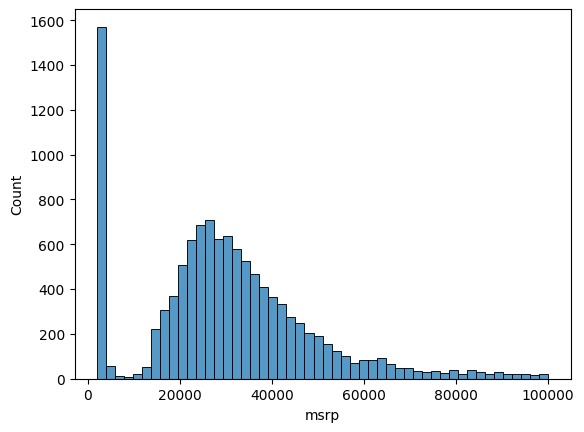

In [21]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [23]:
np.log1p([0, 1, 10, 100, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [24]:
np.log([0 + 1, 1 + 1, 1 + 10, 1 + 100, 1 + 1000, 1 + 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       11.51293546])

In [ ]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

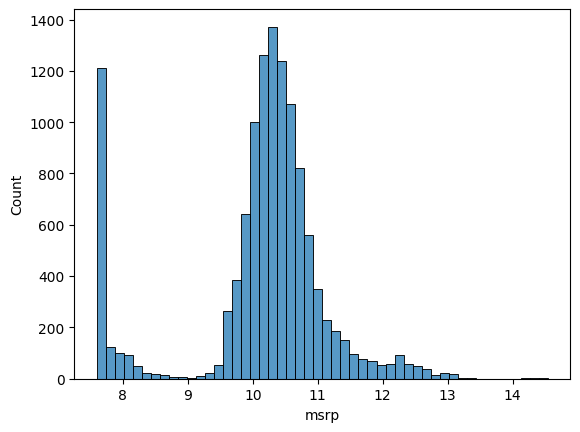

In [26]:
sns.histplot(price_logs, bins=50)

In [29]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Set up validation framework

In [ ]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [35]:
n, n_val + n_test + n_train

(11914, 11914)

In [36]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [ ]:
df.iloc

In [70]:
idx = np.arange(n)

In [74]:
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9449,chevrolet,silverado_1500_classic,2007,regular_unleaded,285.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,19,15,1385,25960
4254,volkswagen,eurovan,2002,premium_unleaded_(recommended),201.0,6.0,automatic,front_wheel_drive,3.0,NaN,large,passenger_minivan,18,15,873,27700
10050,chevrolet,suburban,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,23,16,1385,55045
6332,mitsubishi,lancer,2015,regular_unleaded,168.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,30,23,436,21595
7223,volkswagen,new_beetle,2010,regular_unleaded,150.0,5.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,20,873,20390
2690,mercedes-benz,cla-class,2016,premium_unleaded_(required),208.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,midsize,sedan,38,26,617,32050
3398,mazda,cx-7,2012,premium_unleaded_(recommended),244.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,17,586,33540
6826,mitsubishi,mirage_g4,2017,regular_unleaded,78.0,3.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,42,35,436,16995
6753,bmw,m,2001,premium_unleaded_(required),315.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,23,15,3916,44990
10675,ford,transit_connect,2017,flex-fuel_(unleaded/e85),169.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,cargo_minivan,27,20,5657,23900


In [79]:
np.random.seed(2)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [84]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
676,pontiac,6000,1990,regular_unleaded,140.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,wagon,27,17,210,2000
4748,toyota,fj_cruiser,2014,regular_unleaded,260.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,20,16,2031,27680
3123,honda,crosstour,2015,regular_unleaded,278.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",midsize,4dr_hatchback,28,19,2202,35290
2600,honda,civic,2017,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,39,30,2202,20950
4521,ford,f-150,2016,flex-fuel_(unleaded/e85),282.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,23,17,5657,35330


In [85]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [89]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [90]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [92]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [94]:
len(y_train)

7150

### Linear Regression

In [95]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,pontiac,6000,1990,regular_unleaded,140.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,wagon,27,17,210
1,toyota,fj_cruiser,2014,regular_unleaded,260.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,20,16,2031
2,honda,crosstour,2015,regular_unleaded,278.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",midsize,4dr_hatchback,28,19,2202
3,honda,civic,2017,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,39,30,2202
4,ford,f-150,2016,flex-fuel_(unleaded/e85),282.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,23,17,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,nissan,juke,2015,premium_unleaded_(recommended),188.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",compact,4dr_hatchback,31,26,2009
7146,suzuki,xl-7,2006,regular_unleaded,185.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,16,481
7147,cadillac,cts,2015,flex-fuel_(unleaded/e85),321.0,6.0,automatic,all_wheel_drive,4.0,"flex_fuel,luxury,performance",large,sedan,26,18,1624
7148,chevrolet,cavalier,2005,regular_unleaded,140.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,23,1385


In [96]:
df_train.iloc[10]

make                           hyundai
model                          tiburon
year                              2007
engine_fuel_type      regular_unleaded
engine_hp                        172.0
engine_cylinders                   6.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    2.0
market_category              hatchback
vehicle_size                   compact
vehicle_style            2dr_hatchback
highway_mpg                         24
city_mpg                            17
popularity                        1439
Name: 10, dtype: object

In [120]:
xi = [172, 17, 1439]

In [125]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [ ]:
# TO-DO: implement it!

def linear_regression(xi):
    n = len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [108]:
linear_regression(xi)

12.448

In [109]:
np.expm1(12.448)

np.float64(254739.33214455764)

In [111]:
np.log1p(254739.33214455764)

np.float64(12.448)

In [99]:
g(xi)

10000

### Linear regression vector form

In [112]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [126]:
w_new = [w0] + w

In [127]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [129]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [130]:
linear_regression(xi)

12.448

In [135]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [136]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [137]:
def linear_regression(X):
    return X.dot(w_new)

In [138]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### Train Linear Regression Model

In [139]:
def train_linear_regression(X, y):
    pass

In [168]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 24, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   24,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [155]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [158]:
X = np.column_stack([ones, X])

In [148]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [160]:
XTX = X.T.dot(X)

In [161]:
XTX_inv = np.linalg.inv(XTX)

In [162]:
w_full = XTX_inv.dot(X.T).dot(y)

In [164]:
w0 = w_full[0]
w = w_full[1:]

In [165]:
w0, w

(np.float64(252.37599202446552),
 array([-0.11762446, -2.36784745, -0.00636109]))

In [166]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [169]:
train_linear_regression(X, y)

(np.float64(252.37599202446552),
 array([-0.11762446, -2.36784745, -0.00636109]))

### 2.8 Car price baseline model

In [171]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [172]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [173]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [176]:
X_train = df_train[base].values
X_train

array([[ 140.,    6.,   27.,   17.,  210.],
       [ 260.,    6.,   20.,   16., 2031.],
       [ 278.,    6.,   28.,   19., 2202.],
       ...,
       [ 321.,    6.,   26.,   18., 1624.],
       [ 140.,    4.,   33.,   23., 1385.],
       [ 173.,    4.,   25.,   19.,  210.]], shape=(7150, 5))

In [186]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 140.,    6.,   27.,   17.,  210.],
       [ 260.,    6.,   20.,   16., 2031.],
       [ 278.,    6.,   28.,   19., 2202.],
       ...,
       [ 321.,    6.,   26.,   18., 1624.],
       [ 140.,    4.,   33.,   23., 1385.],
       [ 173.,    4.,   25.,   19.,  210.]], shape=(7150, 5))

In [182]:
w0, w = train_linear_regression(X_train, y_train)

In [189]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.02598596, 10.00688355, 10.33984232, ..., 10.70768577,
        9.46889378,  9.61570372], shape=(7150,))

<Axes: ylabel='Count'>

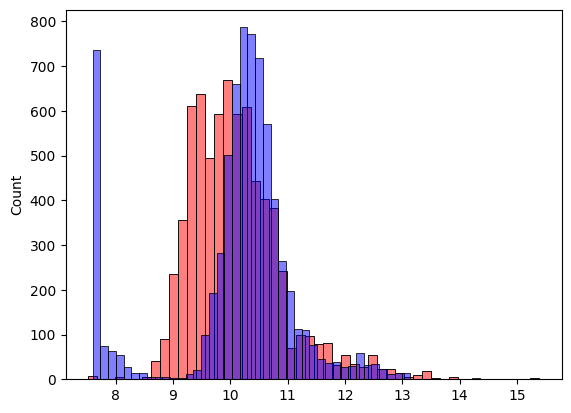

In [196]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### 2.9 RMSE (root mean squared error)

In [197]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [198]:
rmse(y_train, y_pred)

np.float64(0.7593273199646629)

### 2.10 Validate the model

In [199]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [204]:
# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [205]:
rmse(y_val, y_pred)

np.float64(0.7416828706090519)

### 2.11 Simple feature engineering

In [206]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,pontiac,6000,1990,regular_unleaded,140.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,wagon,27,17,210
1,toyota,fj_cruiser,2014,regular_unleaded,260.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,20,16,2031
2,honda,crosstour,2015,regular_unleaded,278.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",midsize,4dr_hatchback,28,19,2202
3,honda,civic,2017,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,39,30,2202
4,ford,f-150,2016,flex-fuel_(unleaded/e85),282.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,23,17,5657


In [218]:
def prepare_X(df):
    df = df.copy() # work with copy

    df['age'] = 2017 - df['year']
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [222]:
X_train = prepare_X(df_train)
X_train

array([[1.400e+02, 6.000e+00, 2.700e+01, 1.700e+01, 2.100e+02, 2.700e+01],
       [2.600e+02, 6.000e+00, 2.000e+01, 1.600e+01, 2.031e+03, 3.000e+00],
       [2.780e+02, 6.000e+00, 2.800e+01, 1.900e+01, 2.202e+03, 2.000e+00],
       ...,
       [3.210e+02, 6.000e+00, 2.600e+01, 1.800e+01, 1.624e+03, 2.000e+00],
       [1.400e+02, 4.000e+00, 3.300e+01, 2.300e+01, 1.385e+03, 1.200e+01],
       [1.730e+02, 4.000e+00, 2.500e+01, 1.900e+01, 2.100e+02, 9.000e+00]],
      shape=(7150, 6))

In [223]:
# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.505098908130034)

<Axes: ylabel='Count'>

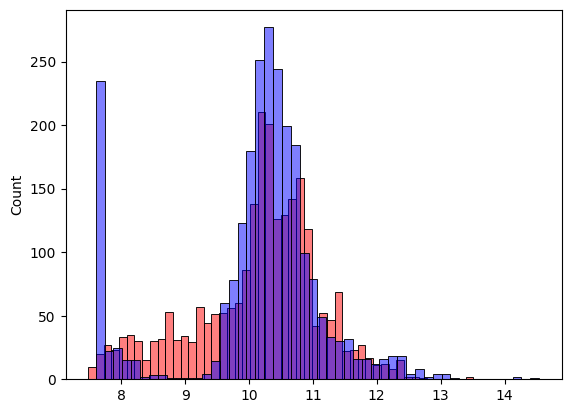

In [224]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### 2.12 Categorical variables

In [239]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train['number_of_doors'] == v).astype('int')

In [271]:
def prepare_X(df):
    df = df.copy() # work with copy
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [272]:
prepare_X(df_train)

array([[140.,   6.,  27., ...,   0.,   0.,   1.],
       [260.,   6.,  20., ...,   0.,   0.,   1.],
       [278.,   6.,  28., ...,   0.,   0.,   1.],
       ...,
       [321.,   6.,  26., ...,   0.,   0.,   1.],
       [140.,   4.,  33., ...,   1.,   0.,   0.],
       [173.,   4.,  25., ...,   1.,   0.,   0.]], shape=(7150, 9))

In [273]:
# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5016682102042964)

In [274]:
np.float64(0.505098908130034)

np.float64(0.505098908130034)

In [293]:
makes = list(df['make'].value_counts().head().index)
makes

['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge']

In [319]:
def prepare_X(df):
    df = df.copy() # work with copy
    features = base.copy()

    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype('int')
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype('int')
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [320]:
# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.49200591215911677)

In [321]:
# I lost track

### 2.13 Regularization

In [322]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [328]:
# training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.49206403331351234)

### 2.14 Tuning the model

In [331]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.1, 1, 10]:
    # training part
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # validation part
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 10.681782584688685 0.49200591215911677
1e-06 10.681774697827327 0.4920059176142849
0.0001 10.680994065150262 0.49200645803890447
0.001 10.673912008739688 0.49201140447767555
0.1 10.027924849610052 0.49279207022633303
1 8.088197525476 0.4989826921814991
10 6.662508354267145 0.5104084945239992


In [332]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

# validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.49201140447767555)

### 2.15 Using the model

In [334]:
df_full_train = pd.concat([df_train, df_val])

In [335]:
df_full_train = df_full_train.reset_index(drop=True)

In [336]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,pontiac,6000,1990,regular_unleaded,140.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,wagon,27,17,210,0.0,0.0,1.0
1,toyota,fj_cruiser,2014,regular_unleaded,260.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,20,16,2031,0.0,0.0,1.0
2,honda,crosstour,2015,regular_unleaded,278.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",midsize,4dr_hatchback,28,19,2202,0.0,0.0,1.0
3,honda,civic,2017,regular_unleaded,158.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,39,30,2202,1.0,0.0,0.0
4,ford,f-150,2016,flex-fuel_(unleaded/e85),282.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,23,17,5657,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,honda,hr-v,2016,regular_unleaded,141.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,32,27,2202,NaN,NaN,NaN
9528,kia,spectra,2007,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,32,23,1720,NaN,NaN,NaN
9529,pontiac,bonneville,2004,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,27,18,210,NaN,NaN,NaN
9530,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,NaN,NaN,NaN


In [337]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[140.,   6.,  27., ...,   0.,   0.,   0.],
       [260.,   6.,  20., ...,   0.,   1.,   0.],
       [278.,   6.,  28., ...,   0.,   0.,   0.],
       ...,
       [205.,   6.,  27., ...,   0.,   0.,   0.],
       [320.,   6.,  28., ...,   0.,   0.,   0.],
       [430.,   8.,  20., ...,   0.,   0.,   0.]], shape=(9532, 14))

In [338]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 7.60140233, 10.22850154, 10.47138325, ..., 10.21045741,
       10.68168794, 11.77067139], shape=(9532,))

In [339]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [340]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.510168709873624)

In [343]:
car = df_test.iloc[20].to_dict()
car

{'make': 'volvo',
 'model': 'xc60',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 300.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,luxury,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 24,
 'city_mpg': 17,
 'popularity': 870}

In [344]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,xc60,2015,regular_unleaded,300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,870


In [347]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
X_small, y_pred

(array([[300.,   6.,  24.,  17., 870.,   2.,   0.,   0.,   1.,   0.,   0.,
           0.,   0.,   0.]]),
 array([10.82492474]))

In [349]:
np.expm1(y_pred), np.expm1(y_test[20])

(array([50256.98599481]), np.float64(42949.99999999997))

In [350]:
# Last output would show up like magic for me...